In [29]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 1. Load the cancer data set and check its size

In [31]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [32]:
X, y = cancer.data, cancer.target

In [33]:
X.shape

(569, 30)

In [34]:
type(y)

numpy.ndarray

In [35]:
np.unique(y, return_counts = True)

(array([0, 1]), array([212, 357]))

### 2. Form train and test dasets and scale the data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
import pandas as pd
pd.DataFrame(X_train).boxplot()
plt.yscale("log")

In [38]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [39]:
X_train_s = scaler.transform(X_train)

In [40]:
logreg1 = LogisticRegression()

In [41]:
logreg1.fit(X_train_s, y_train)

LogisticRegression()

In [42]:
X_test_s = scaler.transform(X_test)

In [43]:
logreg1.score(X_test_s, y_test)

0.9736842105263158

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_s, y_train)
knn5.score(X_test_s, y_test)

0.9473684210526315

In [46]:
logreg2 = LogisticRegression(max_iter=15000)
logreg2.fit(X_train, y_train)
logreg2.score(X_test, y_test)

0.956140350877193

In [47]:
knn5_2 = KNeighborsClassifier(n_neighbors=5)
knn5_2.fit(X_train, y_train)
knn5_2.score(X_test, y_test)

0.956140350877193

### 3. Fit logistic regression to the first two features of your dataset

In [48]:
X_train_s.shape

(455, 30)

In [ ]:
# reset matplotlib to display scatter properly
plt = None
import matplotlib.pyplot as plt

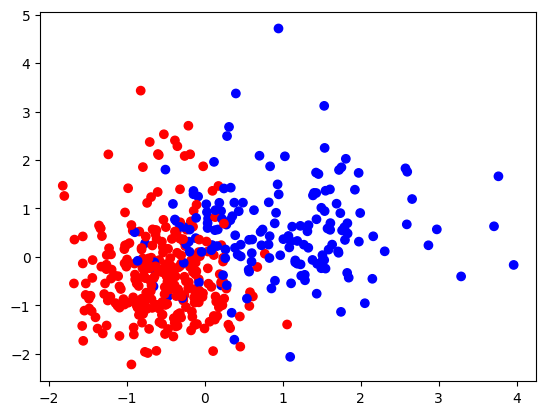

In [ ]:
plt.scatter(X_train_s[:,0], X_train_s[:,1], c=y_train, cmap="bwr")
plt.show()

In [ ]:
logreg3 = LogisticRegression(max_iter = 15000)
# score first 2 columns of training dataset
logreg3.fit(X_train_s[:,:2], y_train)

LogisticRegression(max_iter=15000)

In [ ]:
# score first 2 columns of test dataset
logreg3.score(X_test_s[:,:2], y_test)

0.9035087719298246

In [ ]:
logreg3.coef_.shape # 2d array

(1, 2)

In [68]:
coef = logreg3.coef_
w1 = coef[0][0]
w2 = coef[0][1]

In [69]:
w0 = logreg3.intercept_

In [70]:
# linspace creates numbers within a range
x1 = np.linspace(X_train_s[:,0].min(), X_train_s[:,0].max(), 100)

In [ ]:
x2 = ( -w0*1 -w1*x1 ) / w2

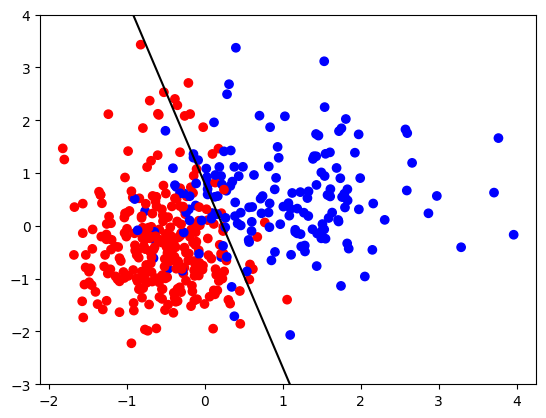

In [72]:
plt.scatter(X_train_s[:,0], X_train_s[:,1], c=y_train, cmap="bwr")
plt.plot(x1, x2, 'k')
plt.ylim(-3, 4)
plt.show()

### 4. Create a scatter plot for the first two features of the train data set and draw the classification line on the graph

Let us pick two points $(x_{00},x_{10})$ and $(x_{01},x_{11})$ on the line $c_0x_0+c_1x_1+b=0$

Let us show these two points on the line:

\begin{align*}
c_0x_{00}+c_1x_{10}&=-6\\
c_0x_{01}+c_1x_{11}&=-6
\end{align*}
Let us subtract the second euation from the first, then we have $(c_0, c_1)\cdot (x_{01}-x_{00}, x_{10}-x_{11})=0$. $(x_{01}-x_{00}, x_{10}-x_{11})$ represents a vector on the line.

### 5. Create a toy dataset using Scikitlearn's make_blobs function.
- Use random_state=4
- Fit LogisticRegression() for C=0.1, 1, 100
- Plot the data on three figures and plot the classification line for each C value.

In [73]:
from sklearn.datasets import make_blobs

In [77]:
X, y = make_blobs(centers=2, random_state=4, n_samples=50)
y[7] = 0
y[27] = 0

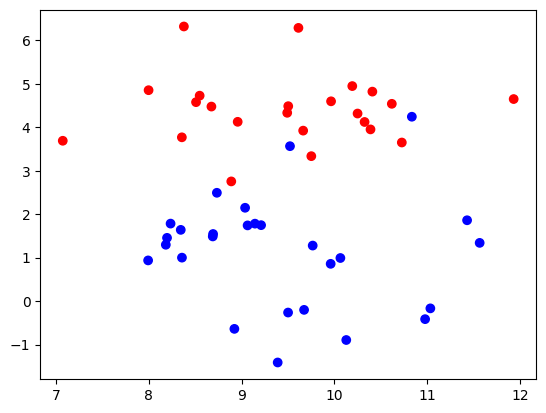

In [78]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
plt.show()

In [ ]:
logreg4 = LogisticRegression(max_iter=15000)
logreg4.fit(X, y)

LogisticRegression(max_iter=5000)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

x1min = X[:,0].min()
x1max = X[:,0].max()
# min and max of first 2 columns dataset
x2min = X[:,1].min()
x2max = X[:,1].max()

for ax, c in zip(axes, [1e-1, 1, 1e2]):
    ax.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
    logreg5 = LogisticRegression(max_iter=15000, C=c)
    logreg5.fit(X, y)
    coef = logreg3.coef_
    w1 = coef[0][0]
    w2 = coef[0][1]
    w0 = logreg3.intercept_
    x1 = np.linspace(x1min, x1max, 100)
    x2 = ( -w0*1 -w1*x1 ) / w2
    ax.plot(x1, x2, 'k')
    ax.set_xlim(x1min, x1max)
    ax.set_ylim(x2min, x2max)
    ax.set_title(f"C:{c}")
#plt.show()

# Multiclass
- Load Iris dataset with `load_iris`
- check the shape and number of unique classes
- Fit Logistic regression and Linear SVC on the dataset
- Print the coefficients
- Print the intercept

In [88]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [89]:
X.shape

(150, 4)

In [90]:
np.unique(y, return_counts = True)

(array([0, 1, 2]), array([50, 50, 50]))

In [94]:
logreg6 = LogisticRegression(multi_class= 'multinomial', max_iter=5000)

In [95]:
logreg6.fit(X,y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=5000, multi_class='multinomial')

In [96]:
logreg6.coef_

array([[-0.42469826,  0.96716091, -2.51551574, -1.08229203],
       [ 0.53510025, -0.32080151, -0.20712507, -0.94316134],
       [-0.110402  , -0.6463594 ,  2.72264081,  2.02545337]])

In [97]:
logreg6.intercept_

array([  9.85442869,   2.23266236, -12.08709105])

In [98]:
xnew = np.array([2,1,5,0.3])

In [99]:
xnew.shape

(4,)

In [105]:
xnew = xnew.reshape(1,-1)

In [106]:
xnew.shape

(1, 4)

In [ ]:
logreg6.predict(xnew)

array([1])

In [108]:
xnew

array([[2. , 1. , 5. , 0.3]])

In [109]:
coef = logreg6.coef_
bias = logreg6.intercept_

In [ ]:
xnew.dot(coef[0,:]) + xnew.dot(bias)

array([-12.78450193])

In [111]:
coef

array([[-0.42469826,  0.96716091, -2.51551574, -1.08229203],
       [ 0.53510025, -0.32080151, -0.20712507, -0.94316134],
       [-0.110402  , -0.6463594 ,  2.72264081,  2.02545337]])

In [115]:
1*9.84293639 + 2*-0.42469826 + 1*0.96716091 + 5*-2.51551574 + 0.3*-1.08229203

-2.9415655290000005

In [ ]:
w0*1 + w1*x1 + w2*x2 + w3*x3 + w4*x4

In [117]:
xnew.dot(coef[0,:]) + 1*bias[0]

array([-2.93007324])

In [121]:
1/1+np.exp( -(xnew.dot(coef[1,:]) + 1*bias[1]) )

array([1.18947701])

In [119]:
xnew.dot(coef[2,:]) + 1*bias[2]

array([1.26658564])

In [120]:
np.unique(y)

array([0, 1, 2])

In [122]:
logreg6.predict_proba(xnew)

array([[0.00601288, 0.59434774, 0.39963938]])